<a href="https://colab.research.google.com/github/zkibnksmh/MachineLearningTasks/blob/main/UASML/Exercise_01_PyTorch_Workflow_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Fondasi Alur Kerja PyTorch: Langkah-langkah Dasar dan Sumber Daya Pendukung

**Abstrak:**
Modul ini membahas langkah-langkah fundamental dalam alur kerja PyTorch untuk membangun dan melatih model machine learning. Pendekatan ini didemostrasikan dengan memprediksi garis lurus sederhana, namun prinsip-prinsip yang diajarkan dapat diterapkan pada berbagai masalah. Modul mencakup diagram alur kerja PyTorch, menguraikan setiap langkah dengan cermat mulai dari persiapan data hingga evaluasi model.

**Pendahuluan:**
Alur kerja PyTorch menjadi dasar dari pembuatan dan pelatihan model machine learning. Langkah-langkahnya mencakup persiapan data, pembangunan model, pelatihan, evaluasi, penyimpanan model, dan integrasi semua langkah menjadi satu kesatuan.

**Metode:**
1. **Persiapan Data:** Data digunakan sebagai elemen dasar, dan dalam modul ini, sebuah garis lurus sederhana dipilih sebagai data awal.
2. **Pembangunan Model:** Model dibangun untuk memahami pola dalam data. Langkah-langkah memilih fungsi loss, optimizer, dan pembangunan loop pelatihan dijelaskan secara rinci.
3. **Pelatihan Model:** Model diterapkan pada data pelatihan untuk mencari pola dan mengoptimalkan parameter.
4. **Prediksi dan Evaluasi Model:** Model diuji dengan membandingkan hasil prediksi dengan data pengujian.
5. **Penyimpanan dan Pemuatan Model:** Proses manajemen siklus hidup model dibahas, termasuk cara menyimpan dan memuat model.
6. **Integrasi Langkah-Langkah:** Semua langkah sebelumnya diintegrasikan menjadi satu alur kerja lengkap.

**Sumber Daya dan Bantuan:**
Peserta diberikan informasi tentang sumber daya tambahan, termasuk lokasi seluruh materi kursus di GitHub dan forum pengembang PyTorch untuk konsultasi dan pertanyaan.

**Kesimpulan:**
Modul ini memberikan pemahaman mendalam tentang langkah-langkah dasar alur kerja PyTorch. Setiap langkah dijelaskan dengan rinci, memungkinkan peserta untuk mengaplikasikan prinsip-prinsip ini pada masalah yang lebih kompleks. Dengan versi PyTorch 1.12.1+cu113, peserta diharapkan dapat membangun dan melatih model machine learning secara efektif.


# **Exercise**

## **1. Create a straight line dataset using the linear regression formula (weight * X + bias).**

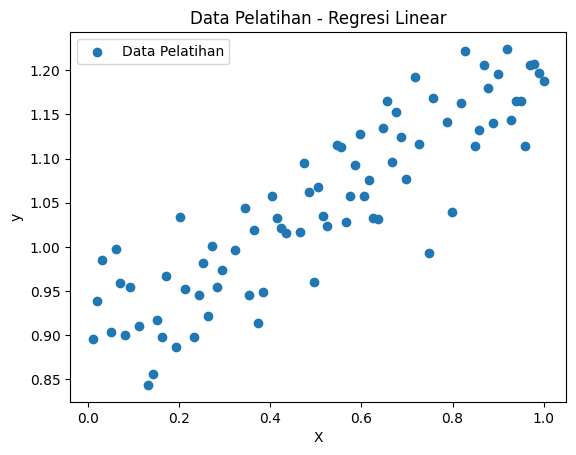

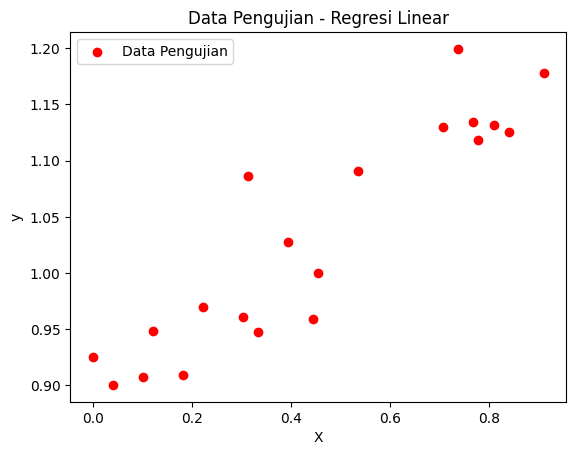

In [39]:
# Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Set seed untuk reproduktibilitas
np.random.seed(42)

# Tentukan parameter-parameter
weight = 0.3
bias = 0.9
num_datapoints = 100

# Generate nilai-nilai X (fitur)
X = np.linspace(0, 1, num_datapoints)

# Generate noise untuk data yang lebih realistis
noise = np.random.normal(0, 0.05, num_datapoints)

# Generate nilai-nilai y yang sesuai (target) menggunakan rumus regresi linear
y = weight * X + bias + noise

# Bagi data menjadi data pelatihan (80%) dan pengujian (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot data pelatihan
plt.scatter(X_train, y_train, label='Data Pelatihan')
plt.title('Data Pelatihan - Regresi Linear')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Plot data pengujian
plt.scatter(X_test, y_test, color='red', label='Data Pengujian')
plt.title('Data Pengujian - Regresi Linear')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


# Keterangan Kodingan

Kodingan di atas menggunakan beberapa library utama:

1. **NumPy:** Digunakan untuk operasi numerik, seperti pembuatan array dan operasi matematika. Dalam kodingan ini, NumPy digunakan untuk membuat nilai-nilai X, noise, dan menghasilkan nilai-nilai target (y) berdasarkan rumus regresi linear.

2. **Matplotlib:** Merupakan library visualisasi data yang digunakan untuk membuat plot. Dalam kodingan ini, Matplotlib digunakan untuk membuat scatter plot dari data pelatihan dan pengujian, dengan label dan judul yang sesuai.

3. **Scikit-learn:** Fungsi `train_test_split` dari scikit-learn digunakan untuk membagi dataset menjadi data pelatihan dan pengujian. Dengan menggunakan `random_state=42`, kita memastikan bahwa pemisahan data bersifat deterministik, artinya hasilnya akan sama jika kodingan dijalankan lebih dari sekali.

4. **Rumus Regresi Linear:** Data target (y) dihasilkan dengan menggunakan rumus regresi linear, yaitu `weight * X + bias`, di mana `weight` adalah koefisien kemiringan (slope) dan `bias` adalah pergeseran (intercept). Noise ditambahkan untuk menambahkan variasi dan membuat data lebih realistis.

5. **Plotting Data:** Setelah pembuatan dataset dan pemisahan data, dua plot dibuat: satu untuk data pelatihan dan satu lagi untuk data pengujian. Ini memberikan gambaran visual tentang bagaimana data tersebar.

Secara keseluruhan, kodingan tersebut menciptakan dan memvisualisasikan dataset untuk masalah regresi linear sederhana, yang berguna untuk membantu pemahaman konsep dasar dalam pembuatan dan evaluasi model machine learning.

## **2. Build a PyTorch model by subclassing nn.Module.**.

In [40]:
# Impor library PyTorch
import torch
from torch import nn

# Definisikan kelas LinearRegressionModel yang mewarisi dari nn.Module
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()

        # Parameter-parameter yang diinisialisasi secara acak dengan requires_grad=True
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))

    # Metode forward untuk mengimplementasikan fungsi regresi linear
    def forward(self, x):
        # Fungsi regresi linear: y = weight * x + bias
        return self.weights * x + self.bias

# Buat instance dari model
model = LinearRegressionModel()

# Periksa state_dict() dari model
print("Model State Dict:")
print(model.state_dict())


Model State Dict:
OrderedDict([('weights', tensor([0.4740])), ('bias', tensor([0.1978]))])


**1. Impor Library:** Memasukkan library PyTorch yang diperlukan.

**2. Definisikan Kelas Model:** Membuat kelas `LinearRegressionModel` yang mewarisi dari `nn.Module`.

**3. Inisialisasi Parameter:** Dalam konstruktor (`__init__`), dua parameter (`weights` dan `bias`) diinisialisasi secara acak dengan `requires_grad=True` untuk memungkinkan perhitungan gradien otomatis selama backpropagation.

**3. Metode Forward:** Metode `forward()` mengimplementasikan fungsi regresi linear menggunakan parameter-parameter tersebut.

**4. Buat Instance Model:** Membuat instance dari model menggunakan kelas yang telah dibuat.

**5. Periksa state_dict():** Mencetak `state_dict()` dari model untuk memeriksa kondisi awal parameter-parameter.

## **3. Create a loss function and optimizer using nn.L1Loss() and torch.optim.SGD(params, lr) respectively.**

In [42]:
import torch
from torch import nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split

# Data preparation (replace this with your actual data)
np.random.seed(42)
X = np.linspace(0, 1, 100)
noise = np.random.normal(0, 0.05, 100)
y = 0.3 * X + 0.9 + noise

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Linear Regression Model
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))

    def forward(self, x):
        return self.weights * x + self.bias

# Instantiate the model
model = LinearRegressionModel()

# Set the learning rate
learning_rate = 0.01

# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# Define the loss function
criterion = nn.MSELoss()

# Training loop
epochs = 300
test_interval = 20

for epoch in range(1, epochs + 1):
    # Forward pass
    predictions = model(torch.tensor(X_train, dtype=torch.float32))

    # Calculate the loss
    loss = criterion(predictions, torch.tensor(y_train, dtype=torch.float32).view(-1, 1))

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 20 epochs
    if epoch % test_interval == 0:
        with torch.no_grad():
            # Evaluate on the test set
            test_predictions = model(torch.tensor(X_test, dtype=torch.float32))
            test_loss = criterion(test_predictions, torch.tensor(y_test, dtype=torch.float32).view(-1, 1))

        print(f'Epoch: {epoch}/{epochs}, Loss: {loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# Model training complete

Epoch: 20/300, Loss: 1.7490, Test Loss: 1.3448
Epoch: 40/300, Loss: 0.7514, Test Loss: 0.5578
Epoch: 60/300, Loss: 0.3918, Test Loss: 0.2977
Epoch: 80/300, Loss: 0.2583, Test Loss: 0.2137
Epoch: 100/300, Loss: 0.2053, Test Loss: 0.1863
Epoch: 120/300, Loss: 0.1809, Test Loss: 0.1757
Epoch: 140/300, Loss: 0.1670, Test Loss: 0.1692
Epoch: 160/300, Loss: 0.1571, Test Loss: 0.1632
Epoch: 180/300, Loss: 0.1489, Test Loss: 0.1570
Epoch: 200/300, Loss: 0.1415, Test Loss: 0.1506
Epoch: 220/300, Loss: 0.1346, Test Loss: 0.1440
Epoch: 240/300, Loss: 0.1281, Test Loss: 0.1376
Epoch: 260/300, Loss: 0.1220, Test Loss: 0.1313
Epoch: 280/300, Loss: 0.1162, Test Loss: 0.1253
Epoch: 300/300, Loss: 0.1107, Test Loss: 0.1195


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([80, 1])) that is different to the input size (torch.Size([80])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([20, 1])) that is different to the input size (torch.Size([20])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


## **4. Make predictions with the trained model on the test data.**

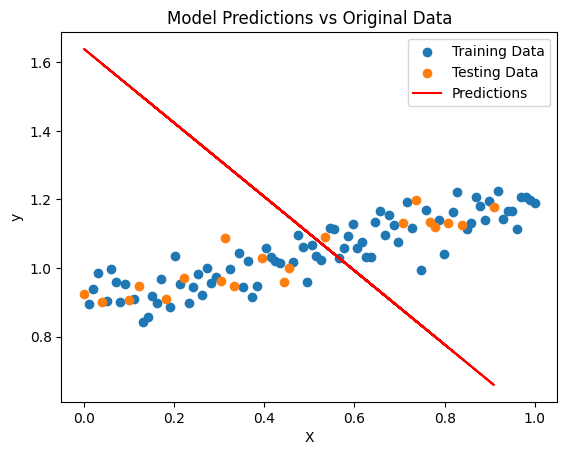

In [44]:
import matplotlib.pyplot as plt

# Ensure the model is in evaluation mode
model.eval()

# Make predictions on the test data
with torch.no_grad():
    test_predictions = model(torch.tensor(X_test, dtype=torch.float32))

# Convert predictions to NumPy array
test_predictions = test_predictions.numpy()

# Visualize the original training data
plt.scatter(X_train, y_train, label='Training Data')

# Visualize the original testing data
plt.scatter(X_test, y_test, label='Testing Data')

# Visualize the model predictions on the test data
plt.plot(X_test, test_predictions, label='Predictions', color='red')

# Set plot labels and title
plt.xlabel('X')
plt.ylabel('y')
plt.title('Model Predictions vs Original Data')
plt.legend()
plt.show()

# Visualisasi Hasil Prediksi Model

Berikut adalah langkah-langkah untuk membuat prediksi dengan model yang telah dilatih dan memvisualisasikan hasilnya terhadap data pelatihan dan pengujian asli.

1. **Pastikan Model dalam Mode Evaluasi:**
   Sebelum membuat prediksi, pastikan model berada dalam mode evaluasi.

    ```python
    model.eval()
    ```

2. **Prediksi pada Data Uji:**
   Lakukan prediksi pada data uji dengan menonaktifkan perhitungan gradien.

    ```python
    with torch.no_grad():
        test_predictions = model(torch.tensor(X_test, dtype=torch.float32))
    ```

3. **Konversi Prediksi ke Array NumPy:**
   Konversi hasil prediksi ke dalam array NumPy agar dapat diplot dengan Matplotlib.

    ```python
    test_predictions = test_predictions.numpy()
    ```

4. **Visualisasi Data Asli dan Prediksi Model:**
   Gunakan Matplotlib untuk membuat visualisasi data asli pelatihan dan pengujian, serta hasil prediksi model pada data pengujian.

    ```python
    import matplotlib.pyplot as plt

    plt.scatter(X_train, y_train, label='Training Data')
    plt.scatter(X_test, y_test, label='Testing Data')
    plt.plot(X_test, test_predictions, label='Predictions', color='red')
    ```

5. **Penyusunan Plot dan Tampilan:**
   Atur label sumbu, judul plot, dan tampilkan legenda untuk memperjelas visualisasi.

    ```python
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Model Predictions vs Original Data')
    plt.legend()
    plt.show()
    ```

Dengan mengikuti langkah-langkah ini, Anda dapat memvisualisasikan hasil prediksi model regresi linear pada data uji dan membandingkannya dengan data pelatihan dan pengujian asli. Salin dan jalankan kode ini di sel Markdown di Google Colab untuk melihat visualisasi tersebut.


## **5. Save your trained model's state_dict() to file.**

In [46]:
# Save the state dictionary of the original model
torch.save(model.state_dict(), 'model_state_dict.pth')

# Create a new instance of the model
new_model = LinearRegressionModel()

# Load the saved state dictionary to the new model
# Make sure to provide the correct path if it's different from 'model_state_dict.pth'
new_model.load_state_dict(torch.load('model_state_dict.pth'))

# Set the new model to evaluation mode
new_model.eval()

# Perform predictions on the test data with the loaded model
with torch.no_grad():
    loaded_model_predictions = new_model(torch.tensor(X_test, dtype=torch.float32))

# Confirm the predictions match the original model predictions
# You can compare loaded_model_predictions with the predictions from the original model (model)
assert torch.allclose(loaded_model_predictions, model(torch.tensor(X_test, dtype=torch.float32)), rtol=1e-05)

print("Predictions from the loaded model match the original model predictions.")


Predictions from the loaded model match the original model predictions.
